In [1]:
import random

N = 5000
counts = [0,0,0,0,0,0] # 1～6の回数を0で初期化

for _ in range(N):
   d = random.randint(1, 6)
   counts[d-1] += 1

for i in range(1, 7):
   print(f"{i}: {counts[i-1]}回")


1: 841回
2: 876回
3: 823回
4: 755回
5: 868回
6: 837回


In [2]:
import math
import random

def f(x):
    return math.sin(x)

exact = 2.0

# モンテカルロ積分
def mc_integral(f, a, b, N=1000):
    total = 0
    for _ in range(N):
        x = random.uniform(a, b)   # 区間[a,b] の乱数
        total += f(x)
    return (b - a) * total / N

# 区分求積法（左端）
def integral_riemann(f, a, b, n=1000):
    width = (b - a) / n
    area = 0
    for i in range(n):
        x = a + i * width  # 左端の値
        area += f(x) * width
    return area

# 台形公式
def integral_trapezoid(f, a, b, n=1000):
    h = (b - a) / n
    s = 0
    for i in range(1, n):
        x = a + i * h
        s += 2 * f(x)
    s += f(a) + f(b)
    return s * h / 2

In [3]:
Ns = [1000, 3000, 10000, 30000]

# モンテカルロは乱数なので、比較を安定させたいなら seed を固定（任意）
random.seed(0)

print("N\tMC値\t\tMC誤差\t\t区分求積誤差\t台形誤差")
for N in Ns:
   mc = mc_integral(f, 0, math.pi, N)
   riem = integral_riemann(f, 0, math.pi, N)
   trap = integral_trapezoid(f, 0, math.pi, N)

   # 誤差を計算    
   err_mc = abs(mc - exact)
   err_riem = abs(riem - exact)
   err_trap = abs(trap - exact)
    
   print(f"{N}\t{mc:.10f}\t{err_mc:.3e}\t{err_riem:.3e}\t{err_trap:.3e}")

N	MC値		MC誤差		区分求積誤差	台形誤差
1000	1.9921363758	7.864e-03	1.645e-06	1.645e-06
3000	1.9968261933	3.174e-03	1.828e-07	1.828e-07
10000	2.0119863603	1.199e-02	1.645e-08	1.645e-08
30000	1.9958621988	4.138e-03	1.828e-09	1.828e-09


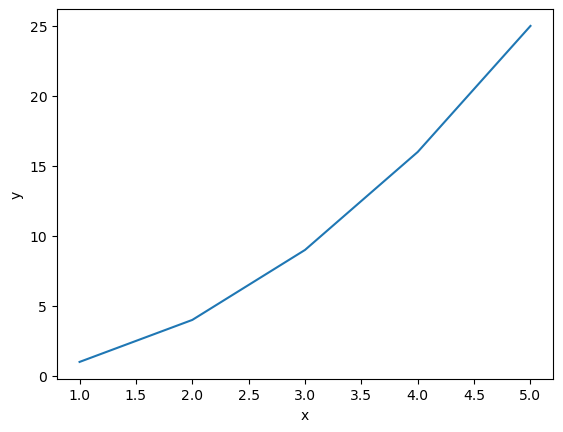

In [6]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16,25]

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

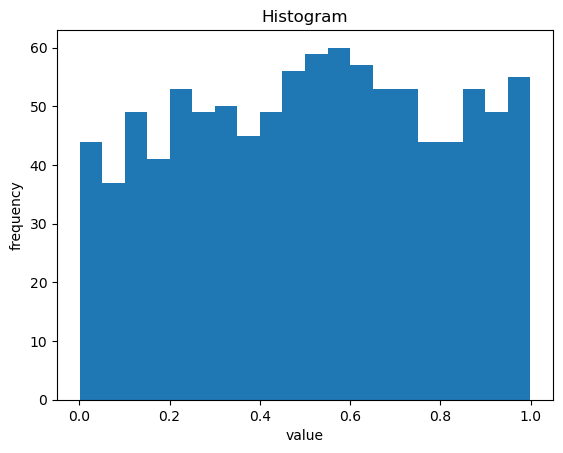

In [7]:
import matplotlib.pyplot as plt
import random

data = [random.random() for _ in range(1000)]

fig, ax = plt.subplots()
ax.hist(data, bins=20) # 幅20としてdata内のデータの数を数え上げる．
ax.set_xlabel("value") # 値
ax.set_ylabel("frequency") # 頻度
ax.set_title("Histogram")
plt.show()


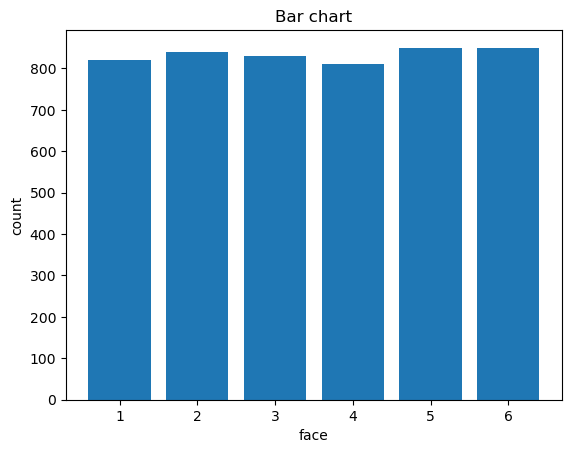

In [8]:
import matplotlib.pyplot as plt

labels = ["1", "2", "3", "4", "5", "6"]
counts = [820, 840, 830, 810, 850, 850]

fig, ax = plt.subplots()
ax.bar(labels, counts) # 棒グラフの描画
ax.set_xlabel("face")
ax.set_ylabel("count")
ax.set_title("Bar chart")

plt.show()

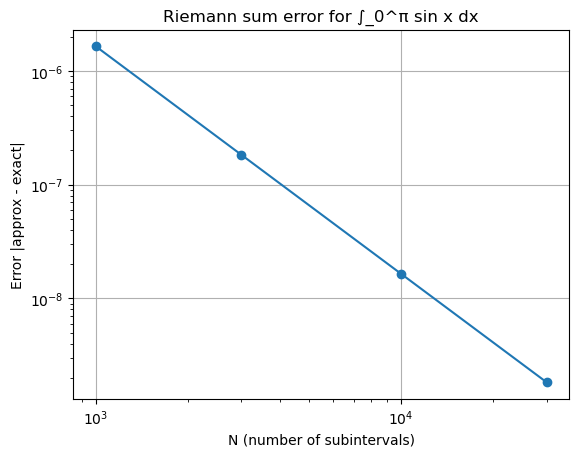

In [16]:
import math
import matplotlib.pyplot as plt

# 積分したい関数
def f(x):
    return math.sin(x)

# 正確な値 ∫_0^π sin x dx = 2
exact = 2.0

# 区分求積法（左端）
def integral_riemann(f, a, b, N):
    width = (b - a) / N
    area = 0.0
    for i in range(N):
        x = a + i * width
        area += f(x) * width
    return area

# 分割数
Ns = [1000, 3000, 10000, 30000]

# 誤差を計算
errors = []
for N in Ns:
    approx = integral_riemann(f, 0, math.pi, N)
    err = abs(approx - exact)
    errors.append(err)

# 可視化
fig, ax = plt.subplots()
ax.plot(Ns, errors, marker="o")
ax.set_xlabel("N (number of subintervals)")
ax.set_ylabel("Error |approx - exact|")
ax.set_title("Riemann sum error for ∫_0^π sin x dx")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)

plt.show()
